# Etapa III - Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

Importação das bibliotecas
Principal biblioteca para utilização dos algoritmos de machine learning: sklearn

In [203]:
import itertools
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

Arquivo específico de configuração. 
Será separada algumas informações em arquivo próprio (.py) visando melhorar a configuração
e possível portabilidade entre computadores evitando editar esse arquivo.

In [204]:
import config
#config start
dataset = config.dataset + "IODP/"
#-----------

Definição de funções específicas para utilização no código
Função: print_accuracy_report - imprime resumo completo do cross validation.
Função: plot_confusion_matrix - imprime resumo completo da matriz confusão.

In [151]:
#functions-----
def print_accuracy_report(classifier_rf, X_train, y_train, num_validations=5):
    accuracy = cross_val_score(classifier_rf, X_train, y_train, scoring='accuracy', cv=num_validations)
    print ("Accuracy:" + str(round(100*accuracy.mean(), 2)) + "%")
    f1 = cross_val_score(classifier_rf,X_train, y_train, scoring='f1_macro', cv=num_validations)
    print ("F1: " + str(round(100*f1.mean(), 2)) + "%")
    precision = cross_val_score(classifier_rf,X_train, y_train, scoring='precision_weighted', cv=num_validations)
    print ("Precision: " + str(round(100*precision.mean(), 2)) + "%")
    recall = cross_val_score(classifier_rf, X_train, y_train, scoring='recall_weighted', cv=num_validations)
    print ("Recall: " + str(round(100*recall.mean(), 2)) + "%") 
    return str(round(100*accuracy.mean(), 2)) + str(round(100*f1.mean(), 2)) + str(round(100*precision.mean(), 2)) + str(round(100*recall.mean(), 2))

def cross_valid_list (classifier_rf, X_train, y_train, num_validations=5):
    accuracy = cross_val_score(classifier_rf, X_train, y_train, scoring='accuracy', cv=num_validations)
    f1 = cross_val_score(classifier_rf,X_train, y_train, scoring='f1_macro', cv=num_validations)
    precision = cross_val_score(classifier_rf,X_train, y_train, scoring='precision_weighted', cv=num_validations)
    recall = cross_val_score(classifier_rf, X_train, y_train, scoring='recall_weighted', cv=num_validations)
    
    accuracy  = round(100*accuracy.mean(), 2)
    f1        = round(100*f1.mean(), 2)
    precision = round(100*precision.mean(), 2) 
    recall    = round(100*recall.mean(), 2)
    return_cross = [accuracy, f1, precision, recall]
    return return_cross

def plot_confusion_matrix(cm, classes,dataset,name_file,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues
                          ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.xlim(-0.5, 5.5) #figure size according to quantity of cod_lit
    plt.ylim(5.5, -0.5) #figure size according to quantity of cod_lit



    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')   
    plt.savefig(dataset+name_file,dpi=96)
#-------------------

Importar - conexão com o dataset.
Para conexão utiliza-se a biblioteca pandas com a função read_csv() resultado na saída um dataframe

In [152]:
name_file = dataset+"dataset_IODP_template_GP.csv"
          

importDt = pd.read_csv(name_file,sep=",")

Imprime o nome completo da url do dataset.

In [153]:
name_file

'datasets/IODP/dataset_IODP_template_GP.csv'

Aplicar os métodos de pré-processamento:

Método 1: Limpeza da base, onde serão removidos espaços em branco e tipos NaN
Para espaços em branco será utilizado a propriedade pandas dataframe replace.
Para tipos NaN será utilizada a propriedade pandas dataframe isna() (true ou false) e propriedade loc para encontrar o valor entre true e false. valor True indica o registro como NaN e caso contrário indica false.

Método 2: Normalizar os dados: será utilizada a função normalize usando a norma max.
Dimensionar os registros de uma forma padrão visando criar uma normalização entre os registros, neste caso, a norma max. Essa função é a maneira mais comum e rápida de dimensionar os dados seguindo o dimensionamento por cada feature individualmente.

Aplicar o método 1 de pré-processamento: Limpeza da base.
Passo 1: Encontrar valores em branco ou vazio (' ') e remover.

In [154]:
importDt["Offset (cm)"]  = importDt["Offset (cm)"].replace(' ', '')
importDt["GRA"]          = importDt["GRA"].replace(' ', '')
importDt["P-wave"]       = importDt["P-wave"].replace(' ', '')
importDt["caliper"]      = importDt["caliper"].replace(' ', '')
importDt["sonic"]        = importDt["sonic"].replace(' ', '')
importDt["MS"]           = importDt["MS"].replace(' ', '')
importDt["ReflectanceL"] = importDt["ReflectanceL"].replace(' ', '')
importDt["Reflectancea"] = importDt["Reflectancea"].replace(' ', '')
importDt["Reflectanceb"] = importDt["Reflectanceb"].replace(' ', '')
importDt["TristimulusX"] = importDt["TristimulusX"].replace(' ', '')
importDt["TristimulusY"] = importDt["TristimulusY"].replace(' ', '')
importDt["TristimulusZ"] = importDt["TristimulusZ"].replace(' ', '')
importDt["cod_lit"]      = importDt["cod_lit"].replace(' ', '')

Continuação do método 1: 
Passo 2: Verificar campos do tipo NaN. Para a feature: Offset (cm), caso encontre um valor NaN será removido. 
Para as demais features será preenchido utilizando o valor da média.

In [155]:
test_isna = importDt.isna()

In [156]:
remove_isna = test_isna.loc[test_isna['Offset (cm)'] == True]
indexx = remove_isna.index
importDt = importDt.drop(indexx)

In [157]:
importDt[['GRA','P-wave','caliper','sonic','MS','ReflectanceL','Reflectancea','Reflectanceb','TristimulusX','TristimulusY','TristimulusZ']] = importDt[['GRA','P-wave','caliper','sonic','MS','ReflectanceL','Reflectancea','Reflectanceb','TristimulusX','TristimulusY','TristimulusZ']].fillna(value=importDt[['GRA','P-wave','caliper','sonic','MS','ReflectanceL','Reflectancea','Reflectanceb','TristimulusX','TristimulusY','TristimulusZ']].mean())

É visualizado um trecho de dados do dataset, por default (5 registros)
importDt é do tipo dataframe com linhas x colunas (linhas são os registros e colunas são as features)

In [158]:
importDt.head()

,Exp,Site,Hole,Core,Type,Sect,Offset (cm),Depth CSF-A (m),GRA,P-wave,caliper,sonic,MS,ReflectanceL,Reflectancea,Reflectanceb,TristimulusX,TristimulusY,TristimulusZ,cod_lit
0,354,U1449,A,2,H,1,12.5,6325,1797.0,1647,6.42,38.97,134.00,30.6,1.5,-0.1,6.3,6.5,7.0,10
1,354,U1449,A,2,H,1,15.0,6350,1804.0,1739,6.40,36.79,140.00,32.5,0.8,-0.6,7.0,7.3,8.0,10
2,354,U1449,A,2,H,1,17.5,6375,1803.0,1725,6.41,37.15,168.33,30.9,0.4,0.3,6.3,6.6,7.0,10
3,354,U1449,A,2,H,1,20.0,6400,1705.0,1729,6.41,37.08,228.00,29.2,1.2,-0.3,5.7,5.9,6.4,10
4,354,U1449,A,2,H,1,22.5,6425,1799.0,1644,6.43,39.11,286.67,31.3,0.5,-0.4,6.5,6.8,7.4,10


Tamanho do dataset em linhas x colunas (registros x features)

In [159]:
importDt.shape

(19560, 20)

Divisão dos registros entre as litologias conforme definido no projeto.

In [160]:
count_cod_lit = importDt["cod_lit"].value_counts()

In [161]:
count_cod_lit

15    8760
14    5679
10    3932
12     669
11     361
13     159
Name: cod_lit, dtype: int64

Selecionando as features para treinamento e teste:
a variável X possui as features para treinamento e teste
a variável z possui a feature específico para predição (somente a feature cod_lit)

In [162]:
features = importDt.columns.difference(["Exp", "Site", "Hole","Core","Type","Sect","Depth CSF-A (m)","cod_lit"])


X = np.array(importDt[features].values)
y = np.array(importDt['cod_lit'].values)


Dividir/particionar os dados:
    Conforme especificado no projeto, é dividido os dados conforme a combinação:
        Train e teste respectivamente: 70%-30%.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

Aplicar o método 2 de pré-processamento: normalização.
axis=0 indica que cada feature é normalizada separadamente.

In [164]:
X_trainnormalized = preprocessing.normalize(X_train, norm='max', axis=0)
X_testnormalized  = preprocessing.normalize(X_test, norm='max', axis=0)

>**Ensemble methods**

Ensemble methods ou Ensemble learning é um paradigma da machine learning onde vários modelos são treinados e testados visando resolver o mesmo problema e combinados para obter um melhor resultado (normalmente o resultado médio é utilizado). Seu objeto é melhorar a generalização e robustez sobre um único estimador.
Duas famílias de métodos compõem o ensemble methods: Averaging methods e Boosting methods.
*Averaging methods* o objetivo desta família de ensemble é construtir vários estimadores de forma independente e após calcular a média de suas previsões. Utilizando a média, normalmente, obtense o melhor resultado do que qualquer estimador de base única e com sua variância reduzida. Cita-se como exemplo os métodos Random Forest e Neighbors-based.
*Boosting methods* nesta família os estimadores são elaborados de forma sequencial e tenta-se reduzir o vies (bias) do estimador combinado. Não utiliza-se média e a combinação visa encontrar modelos fracos e produzir um conjunto poderoso de resultados. Cita-se como exemplo os métodos AdaBoost e Gradient Tree Boosting


**Aplicação do algoritmo: Random Forest**

O método Random Forest (RF) é uma técnica de machine learning (Ensemble methods) que atua na combinação de um conjunto de árvores. Significa que um conjunto aleatória de combinações de árvores é utilizado por este método visando buscar a melhor média da classificação entre todas as combinações disponíveis. 


A configuração max_depth e n_estimators segue um valor definido de forma arbitrária conforme os melhores valores observados 
entre treinamento e teste. Observa-se que partir de n_estimators=400 estabeliza-se o valor  da acurácia.

In [165]:
classifier_rf = RandomForestClassifier(max_depth=10, n_estimators=400, random_state=42, n_jobs=-1)
classifier_rf.fit(X_trainnormalized, y_train)

RandomForestClassifier(max_depth=10, n_estimators=400, n_jobs=-1,
                       random_state=42)

Utilização de métricas para avaliar os resultados do RF
Aqui utiliza-se a função predict buscando criar um preditor conforme o % reservado no test (via função train_test_split) que, neste caso, é 30% para test (aleatório)

In [166]:
y_predRF = classifier_rf.predict(X_testnormalized)

Relatório da classificação - acurácia, precision, recall e f1

In [167]:
print(metrics.classification_report(y_predRF, y_test))

              precision    recall  f1-score   support

          10       0.64      0.73      0.68      1014
          11       0.00      0.00      0.00         0
          12       0.29      0.66      0.40        90
          13       0.00      0.00      0.00         0
          14       0.81      0.62      0.70      2192
          15       0.93      0.96      0.95      2572

    accuracy                           0.79      5868
   macro avg       0.44      0.50      0.46      5868
weighted avg       0.82      0.79      0.80      5868



In [168]:
print ("Accuracy: ")
print(metrics.accuracy_score(y_predRF, y_test))
acc_RF = metrics.accuracy_score(y_predRF, y_test)

Accuracy: 
0.7907293796864349


O cross-validation é utilizado especificamente com os dados de treinamento buscando visualizar a melhor combinação de treinamento com k grupos (utilizado k=5)

In [169]:
print ("Report cross-validatin: ")
print_accuracy_report(classifier_rf, X_train, y_train)
cross_valid_list(classifier_rf, X_train, y_train)

Report cross-validatin: 
Accuracy:84.25%
F1: 52.44%
Precision: 84.76%
Recall: 84.25%


[84.25, 52.44, 84.76, 84.25]

Confusion matrix, without normalization
[[ 744    0    1    0  417    7]
 [  25    0    2    0   75    0]
 [   8    0   59    0  133    2]
 [  21    0    6    0   24    0]
 [ 211    0   21    0 1366   92]
 [   5    0    1    0  177 2471]]


<Figure size 576x432 with 0 Axes>

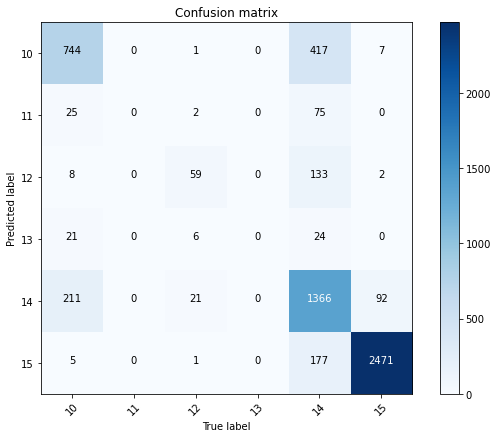

In [170]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predRF)
np.set_printoptions(precision=2)
class_names = list(config.litho) #ajust cod_lit in config file.
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix',dataset=dataset,name_file="cm_RF.jpg")

plt.show()

**Aplicação do algoritmo: Gradient Tree Boosting**

Aplicação do algoritmo: Gradient Tree Boosting.


In [171]:
classifier_gb = GradientBoostingClassifier(n_estimators=5, learning_rate=1.0,max_depth=1, random_state=0)
classifier_gb.fit(X_trainnormalized, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=5,
                           random_state=0)

Utilização de métricas para avaliar os resultados do GB
Aqui utiliza-se a função predict buscando criar um preditor conforme o % reservado no test (via função train_test_split) que, neste caso, é 30% para test (aleatório)

In [172]:
y_predGB = classifier_gb.predict(X_testnormalized)

Relatório da classificação - acurácia, precision, recall e f1

In [173]:
print(metrics.classification_report(y_predGB, y_test))

              precision    recall  f1-score   support

          10       0.70      0.66      0.68      1253
          11       0.01      0.25      0.02         4
          12       0.08      0.35      0.13        46
          13       0.00      0.00      0.00         0
          14       0.70      0.60      0.65      1968
          15       0.92      0.94      0.93      2597

    accuracy                           0.76      5868
   macro avg       0.40      0.47      0.40      5868
weighted avg       0.79      0.76      0.78      5868



In [174]:
print ("Accuracy: ")
print(metrics.accuracy_score(y_predGB, y_test))
acc_GB = metrics.accuracy_score(y_predGB, y_test)

Accuracy: 
0.7614178595773687


In [175]:
print ("Report cross-validatin: ")
print_accuracy_report(classifier_gb, X_train, y_train)
cross_valid_list(classifier_gb, X_train, y_train)

Report cross-validatin: 
Accuracy:76.89%
F1: 42.79%
Precision: 75.27%
Recall: 76.89%


[76.89, 42.79, 75.27, 76.89]

Confusion matrix, without normalization
[[ 823    1    0    0  337    8]
 [  36    1    4    0   60    1]
 [  17    0   16    0  168    1]
 [  25    2    0    0   23    1]
 [ 344    0   26    0 1181  139]
 [   8    0    0    0  199 2447]]


<Figure size 576x432 with 0 Axes>

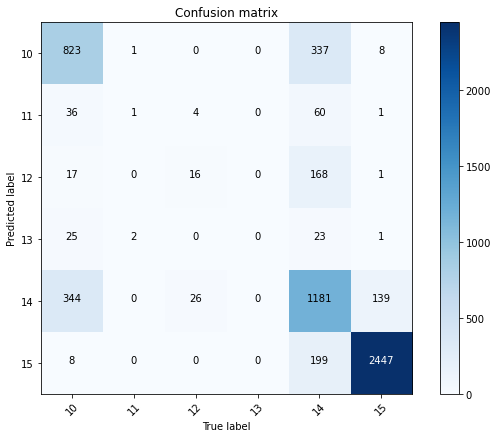

In [176]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predGB)
np.set_printoptions(precision=2)
class_names = list(config.litho) #ajust cod_lit in config file.
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix',dataset=dataset,name_file="cm_GB.jpg")

plt.show()

**Aplicação do algoritmo: AdaBoost**

Aplicação do algoritmo: AdaBoost

In [177]:
classifier_ab = AdaBoostClassifier(n_estimators=6, random_state=42)
classifier_ab.fit(X_trainnormalized, y_train)

AdaBoostClassifier(n_estimators=6, random_state=42)

Utilização de métricas para avaliar os resultados do AB
Aqui utiliza-se a função predict buscando criar um preditor conforme o % reservado no test (via função train_test_split) que, neste caso, é 30% para test (aleatório)

In [178]:
y_predAB = classifier_ab.predict(X_testnormalized)

In [179]:
print(metrics.classification_report(y_predAB, y_test))

              precision    recall  f1-score   support

          10       0.80      0.59      0.68      1595
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.04      0.67      0.07         3
          14       0.58      0.57      0.58      1708
          15       0.89      0.92      0.91      2562

    accuracy                           0.73      5868
   macro avg       0.39      0.46      0.37      5868
weighted avg       0.78      0.73      0.75      5868



In [180]:
print ("Accuracy: ")
print(metrics.accuracy_score(y_predAB, y_test))
acc_AB = metrics.accuracy_score(y_predAB, y_test)

Accuracy: 
0.7305725971370143


In [181]:
print ("Report cross-validatin: ")
print_accuracy_report(classifier_ab, X_train, y_train)
cross_valid_list(classifier_ab, X_train, y_train)

Report cross-validatin: 
Accuracy:73.33%
F1: 37.45%
Precision: 71.25%
Recall: 73.33%


[73.33, 37.45, 71.25, 73.33]

Confusion matrix, without normalization
[[ 936    0    0    1  225    7]
 [  57    0    0    0   43    2]
 [  14    0    0    0  183    5]
 [  31    0    0    2   18    0]
 [ 531    0    0    0  980  179]
 [  26    0    0    0  259 2369]]


<Figure size 576x432 with 0 Axes>

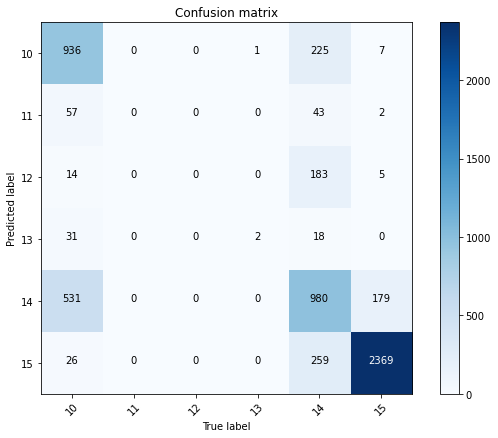

In [182]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predAB)
np.set_printoptions(precision=2)
class_names = list(config.litho) #ajust cod_lit in config file.
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix',dataset=dataset,name_file="cm_AB.jpg")

plt.show()

>**Gráfico dos resultados**

Gráfico das acurácias entre os três métodos de machine learning

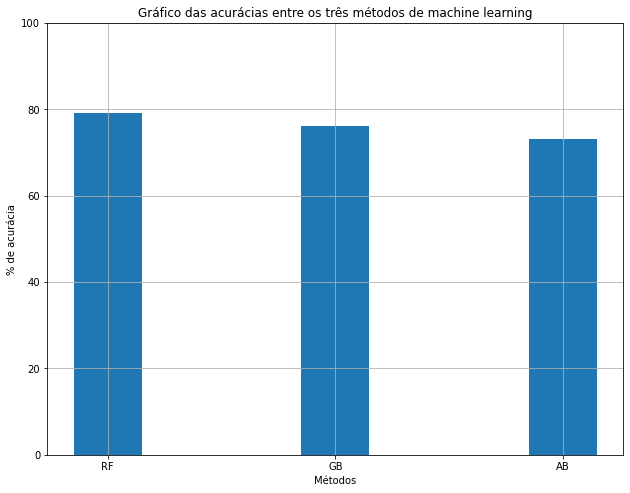

In [183]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Gráfico das acurácias entre os três métodos de machine learning')
ax.set_ylabel('% de acurácia')
ax.set_xlabel('Métodos')
ax.grid(True)
ax.set_ylim(0.0, 100.0)
met = ['RF', 'GB', 'AB']
resul = [acc_RF*100, acc_GB*100, acc_AB*100]
ax.bar(met,resul, width=0.30)

plt.show()

In [211]:
acc_AB

0.7305725971370143

Gráfico Cross validation - treinamento

In [184]:
cv_ab = cross_valid_list(classifier_ab, X_train, y_train)
cv_gb = cross_valid_list(classifier_gb, X_train, y_train)
cv_rf = cross_valid_list(classifier_rf, X_train, y_train)

In [185]:
acc_       = [cv_rf[0],cv_gb[0], cv_ab[0]]
f1_        = [cv_rf[1],cv_gb[1], cv_ab[1]]
precision_ = [cv_rf[2],cv_gb[2], cv_ab[2]]
recall_    = [cv_rf[3],cv_gb[3], cv_ab[3]]

In [186]:
labels = ['RF', 'GB', 'AB']

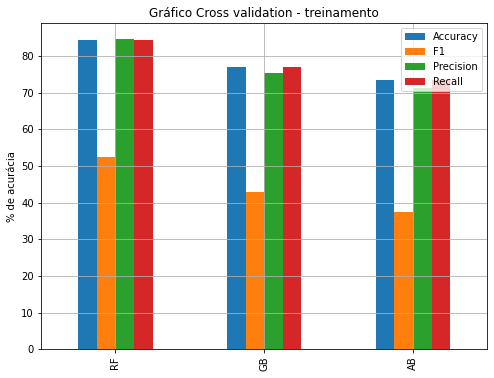

In [187]:
dt_cross = pd.DataFrame({"Accuracy": acc_
                       ,"F1": f1_
                       ,"Precision": precision_ 
                        ,"Recall": recall_}  
                       ,index=labels)

ax = dt_cross.plot.bar(figsize=(8, 6))
ax.set_ylabel('% de acurácia')
ax.set_title('Gráfico Cross validation - treinamento')
ax.grid(True)

Matriz confusão - RF, GB e AB

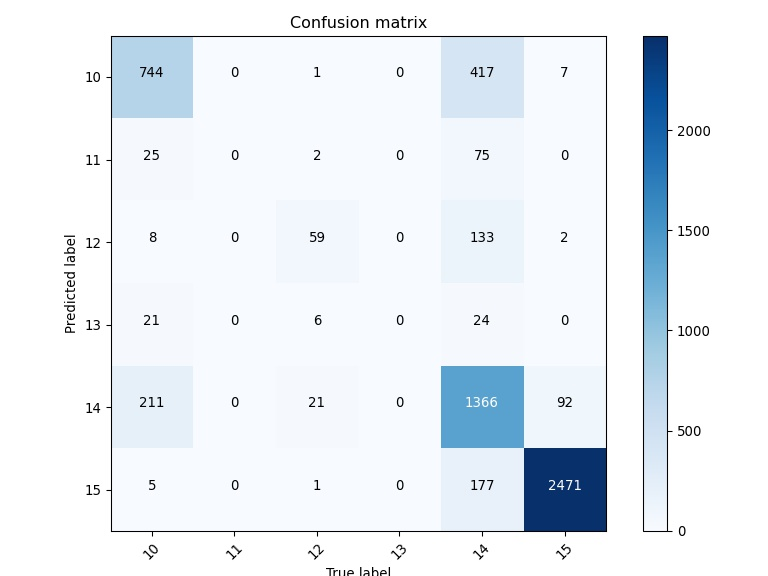

In [188]:
Image(filename=dataset + "cm_RF.jpg",width=400, height=400)

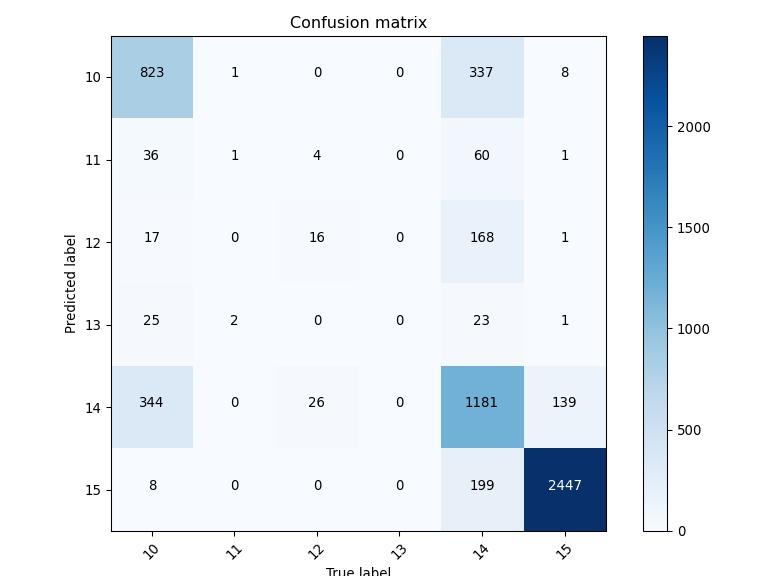

In [189]:
Image(filename=dataset + "cm_GB.jpg",width=400, height=400)

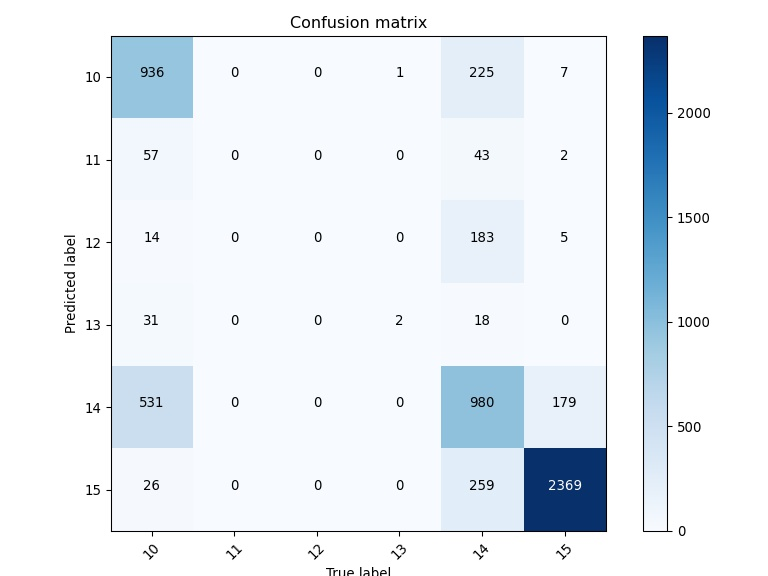

In [190]:
Image(filename=dataset + "cm_AB.jpg",width=400, height=400)

>**Resultado final**

O dataset formado por dados geofísicos das expedições IODP 354, 355, 359 e 362 possue 19560 registros divididos em 20 features (colunas). Observa-se que para classificação os registros estão divididos em 6 classes (aqui chamados de cod_lit=código da litologia) numerados de 10 a 15 como segue:

In [191]:
config.litho

{10: 'Very fine sand/sandstone, Fine sand/sandstone, Medium sand/sandstone, Coarse sand/sandstone, Sand,Sand/Sandstone',
 11: 'Alternating sand/sandstone and mud/mudstone layers, Sandy clay/claystone, Sandy silt/siltstone',
 12: 'Alternating silt/siltstone and clay/claystone layers, Clayey silt/siltstone',
 13: 'Sand/sandstone-silt/siltstone-clay/claystone, Clayey sand/sandstone, Silty sand/sandstone',
 14: 'Silt/Siltstone, Silty clay/claystone, Clay/claystone, Clay, Silt, Mudstone',
 15: 'Calcareous silty clay/claystone, Calcareous silt/siltstone, Calcareous ooze, Chalk, Marlstone, Rudstone, Floatstone, Grainstone, Packstone, Wackestone, Boundstone, Limestone, Calcareous claystone'}

A formação das litologias (seleção) está vinculada com as características de cada expedição. Como as expedições são semelhantes (quanto a tipo de rocha estudada) pode-se agrupar as litologias formando esses 6 grupos.
A quantidade de registros por classe de litologia (cod_lit) é observado abaixo:

In [192]:
count_cod_lit

15    8760
14    5679
10    3932
12     669
11     361
13     159
Name: cod_lit, dtype: int64

As classes cod_lit (11, 12 e 13) possuem poucos registros visto que são litologias bem específicas, formadas pela intercalação entre sand, mud e clay formando uma litologia com poucos registros e localizada em pequenos locais na perfuração. Por ser uma litologia 'misturando' três composições diferentes, seus registros de propriedades são muito parecidos dificultando o treinamento e testes pelo algoritmo. Dessa forma observa-se que a classificação (via matriz confusão) não obteve bons resultados para estas três classes (11, 12 e 13).
Na matriz confusão observa-se que para os três algoritmos os resultados foram satisfatórios (com acurácia superior a 73%) destacando as litologias 15 e 14 com melhores resultados. Apesar de as litologias 15 e 14 possuirem mais registros, são litologias com características litologias e registros de dados geofísicos bem distintos possibilizando ótimos resultados de classificação para a % de teste selecionada (30% de registros). Abaixo é observada o % de acerto para cada cod_lit em relação ao % total de testes (30% de registros):

*% de acerto para cada cod_lit em relação ao % total de testes*

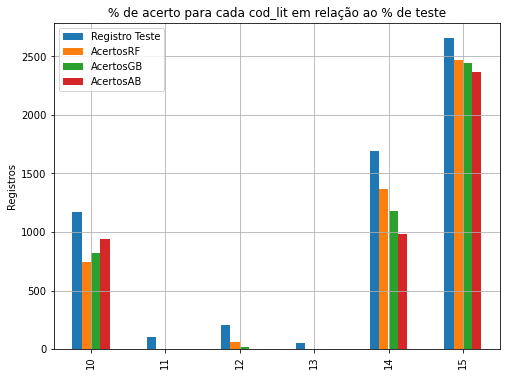

In [206]:
te    = y_test
preRF = y_predRF
preGB = y_predGB
preAB = y_predAB
result_RF = te == preRF 
result_GB = te == preGB 
result_AB = te == preAB

result_id = pd.DataFrame({"Test": te
                       ,"PredRF": preRF
                       ,"PredGB": preGB
                       ,"PredAB": preAB
                       ,"ResultRF": result_RF 
                       ,"ResultGB": result_GB 
                       ,"ResultAB": result_AB 
                        })

litho_cod = list(config.litho)

resultAcert = []
for x in range(0,len(litho_cod)):
    #print (litho_cod[x])
    number_correct = result_id[(result_id["Test"] == litho_cod[x])].count()
    number_correct = number_correct["Test"]
    
    #---RF    
    number_correctTrueRF = result_id[(result_id["Test"] == litho_cod[x]) & (result_id["ResultRF"] == True)].count()
    number_correctTrueRF = number_correctTrueRF["ResultRF"]
    #--RF
    #---GB    
    number_correctTrueGB = result_id[(result_id["Test"] == litho_cod[x]) & (result_id["ResultGB"] == True)].count()
    number_correctTrueGB = number_correctTrueGB["ResultGB"]
    #--GB
    #---AB    
    number_correctTrueAB = result_id[(result_id["Test"] == litho_cod[x]) & (result_id["ResultAB"] == True)].count()
    number_correctTrueAB = number_correctTrueAB["ResultAB"]
    #--AB
    
    resultAcert.append([number_correct,number_correctTrueRF,number_correctTrueGB,number_correctTrueAB])

df_resultAcert = pd.DataFrame(resultAcert,
                   columns=['Total', 'AcertosRF', 'AcertosGB', 'AcertosAB'])
df_resultAcert.set_index([litho_cod], inplace=True)
ax = df_resultAcert.plot.bar(figsize=(8, 6))
ax.set_ylabel('Registros')
ax.set_title('% de acerto para cada cod_lit em relação ao % total de testes')
ax.grid(True)

In [208]:
df_resultAcert

,Registro Teste,AcertosRF,AcertosGB,AcertosAB
10,1169,744,823,936
11,102,0,1,0
12,202,59,16,0
13,51,0,0,2
14,1690,1366,1181,980
15,2654,2471,2447,2369


Analisando o resultado acima observa-se que os cod_lits(14 e 15) obtiveram excelentes resultados de acurácia com valor de 93,10% para RF no cod_lit=15, 92,20% para GB no cod_lit=15, 89,26% para AB no cod_lit=15, 80,82% para RF no cod_lit=14, 69,88% para GB no cod_lit=14 e 58,00% para AB no cod_lit=14 estando o RF com melhor resultado. Para o cod_lit(10) o melhor resultado de acurácia está no AB com valor igual a 80,07%. Os cod_lits (11,12 e 13) pelas características já citadas, possuem poucos registros no respectivo dataset e sua acurácia para classificação foi bastante baixa.

Em relação a aplicação da Cross-validation para analisar os dados de treinamento observa-se que para os algoritmos GB e AB os valores de acurácia, precision, recall e f1 seguem os padrões encontrados de acurária para o % de registro de testes (30%). Para o algoritmo RF os valores de cross-validation são melhores indicando um melhor treinamento e teste com outros intervalos de % para teste (diferente de 30%) e com outras combinações para divisão de treinamento e teste (ajuste da forma aleatória). A configuração do cross-validation dividiu, por padrão, todo o dataset em k=5 e após aplicou as funções do cross-validation.

Observa-se no geral que o RF possui melhor resultado de acurária com 79,07% seguido do GB com 76,14% e o AB com 73,05%. Para o cod_lit=14 e 15 o melhor algoritmo é o RF e para o cod_lit=10 o melhor resultado está no algoritmo AB.
Importante destacar que o dataset deve ser incrementado com mais registros (nas litologias presentes ou mesmo adicionando novas litologias), dados geofísicos de outras expedições IODP ou mesmo rodando algum método de interpolação de valores conforme o(s) intervalo(s) de profundidade selecionados.